In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.inspection import permutation_importance

In [155]:
df = pd.read_csv("/Users/JAISHREERAM/Desktop/TITANIC_ML/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [156]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [157]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [158]:
df['Z-Score'] = (df['Fare'] - df['Fare'].mean()) / df['Fare'].std()

df_cleaned = df[np.abs(df['Z-Score']) <= 3]

df_cleaned = df_cleaned.drop(columns=['Z-Score'])

df_cleaned

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [159]:
X = df_cleaned.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Survived'])
y = df_cleaned['Survived']
X.isnull().sum()

Pclass      0
Sex         0
Age       175
SibSp       0
Parch       0
Fare        0
dtype: int64

In [160]:
X = X.interpolate(method='linear', limit_direction='both')
X.isnull().sum()

/var/folders/54/vftdzdb9215g6mwz7ln97rj40000gp/T/ipykernel_2699/14882089.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  X = X.interpolate(method='linear', limit_direction='both')


Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [161]:
X.dtypes

Pclass      int64
Sex        object
Age       float64
SibSp       int64
Parch       int64
Fare      float64
dtype: object

In [162]:
X['Age'] = X['Age'] / 100
X['Sex'] = X['Sex'].map({'male': 1, 'female': 0})

In [163]:
X.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [164]:
scaler = StandardScaler()
X['Fare'] = scaler.fit_transform(X[['Fare']] )

In [165]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,0.220,1,0,-0.657256
1,1,0,0.380,1,0,1.525623
2,3,0,0.260,0,0,-0.634246
3,1,0,0.350,1,0,0.905759
4,3,1,0.350,0,0,-0.629984
...,...,...,...,...,...,...
886,2,1,0.270,0,0,-0.461240
887,1,0,0.190,0,0,0.118286
888,3,0,0.225,1,2,-0.105002
889,1,1,0.260,0,0,0.118286


In [166]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 871, dtype: int64

In [167]:
model = RandomForestClassifier()

cv_scores = cross_val_score(model, X, y, cv=5)

print("Cross-Validation Scores:", cv_scores)
print(f"Mean Cross-Validation Score: {cv_scores.mean():.2f}")

Cross-Validation Scores: [0.77142857 0.81034483 0.86206897 0.8045977  0.83333333]
Mean Cross-Validation Score: 0.82


In [168]:
#Doesn't perform as good as RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

model2 = KNeighborsClassifier()

cv_scores2 = cross_val_score(model2, X, y, cv=5)

print("Cross-Validation Scores:", cv_scores2)
print(f"Mean Cross-Validation Score: {cv_scores2.mean():.2f}")

Cross-Validation Scores: [0.76       0.74712644 0.79310345 0.8045977  0.83333333]
Mean Cross-Validation Score: 0.79


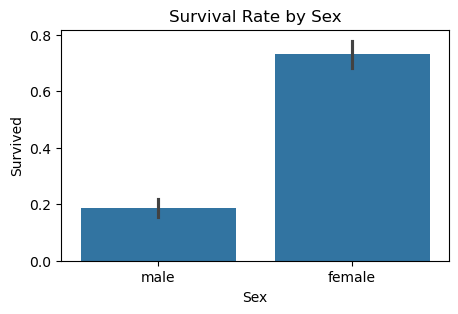

In [169]:
# 1. Survival Rate by Sex
plt.figure(figsize=(5, 3))
sns.barplot(x='Sex', y='Survived', data=df_cleaned)
plt.title('Survival Rate by Sex')
plt.show()

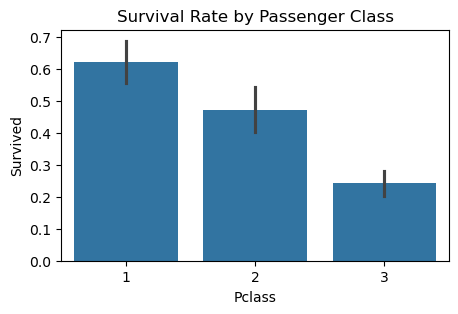

In [170]:
# 2. Survival Rate by Pclass
plt.figure(figsize=(5, 3))
sns.barplot(x='Pclass', y='Survived', data=df_cleaned)
plt.title('Survival Rate by Passenger Class')
plt.show()

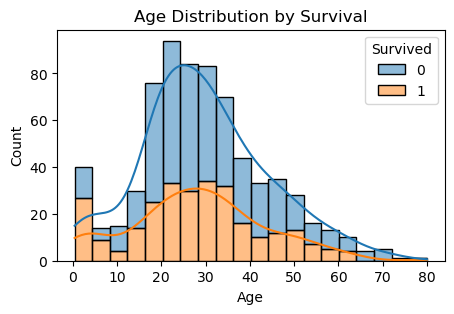

In [171]:
# 3. Age Distribution
plt.figure(figsize=(5, 3))
sns.histplot(data=df_cleaned, x='Age', hue='Survived', multiple='stack', kde=True)
plt.title('Age Distribution by Survival')
plt.show()